In [1]:
# import keras directly, not using tensorflow: tell it is also possible!
import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
# cifar-10 using keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# dataset check
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[6]


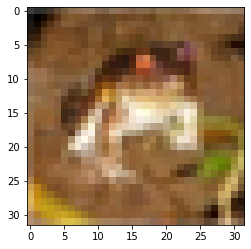

In [4]:
# let's visualize first training image
plt.imshow(x_train[0])
print(y_train[0])

In [5]:
print(np.amax(x_train[0]),np.amin(x_train[0]))
print(np.amax(y_train),np.amin(y_train))

255 0
9 0


In [6]:
# normalization and one-hot encoding
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
# difference between sequential and functional
# linear-wise layer adding!
from keras.layers import Conv2D, BatchNormalization, Dropout, Dense, Flatten, MaxPool2D
from keras.models import Sequential

inzvaNet = Sequential()

inzvaNet.add(BatchNormalization())
inzvaNet.add(Conv2D(64,(5,5),activation = 'tanh', padding = 'same'))
inzvaNet.add(MaxPool2D())
inzvaNet.add(Dropout(0.2))

inzvaNet.add(BatchNormalization())
inzvaNet.add(Conv2D(128,(5,5),activation = 'tanh', padding = 'same'))
inzvaNet.add(MaxPool2D())
inzvaNet.add(Dropout(0.2))

inzvaNet.add(BatchNormalization())
inzvaNet.add(Conv2D(256,(5,5),activation = 'tanh', padding = 'same'))
inzvaNet.add(MaxPool2D())
inzvaNet.add(Dropout(0.2))

inzvaNet.add(Flatten())
inzvaNet.add(Dense(10,activation = 'softmax'))

In [8]:
# just like functional API, optimizer and compile
from keras.optimizers import Adam
opt = Adam(lr = 0.001)
inzvaNet.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [9]:
inzvaNet.fit(x_train, y_train, batch_size=100, epochs=1, validation_split = 0.1)

450/450 [==============================] - 243s 540ms/step - loss: 1.5770 - accuracy: 0.4672 - val_loss: 1.2639 - val_accuracy: 0.5712


In [10]:
inzvaNet.evaluate(x_test, y_test)

313/313 [==============================] - 23s 74ms/step - loss: 1.2830 - accuracy: 0.5647


[1.2830151319503784, 0.5647000074386597]

3
2


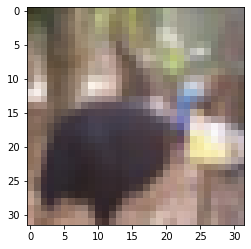

In [11]:
# checking some predictions of our model
randind = int(random.random() * 1000)
plt.imshow(x_test[randind])
print(np.argmax(inzvaNet.predict(x_test[[randind]])))
print(np.argmax(y_test[randind]))

In [12]:
import os
import glob

In [13]:
# new dataset pre-processing to use in transfer learning
# show dataset's first form from kaggle
# explain the aim of each function
def getFilenames(exts):
    fnames = [glob.glob(ext) for ext in exts]
    return fnames[0]

In [17]:
def rename_all(curr_list, name, file):
    for count, filename in enumerate(curr_list):
        dst = name + file + "_test" + str(count) + ".jpg"
        src = name + filename
        os.rename(src, dst)

In [18]:
#exts = ["GoT_dataset/train/arya/*.jpg"]
#res = getFilenames(exts)


# renaming dataset into an order!
# apply twice for both train and test. Change /test/ to /train/ for training data!
# change also in rename_all function! _test -> _train!
files = ["arya", "cersie", "danerys", "Jaimie", "john", "ned stark", "peter baelish", "sansa", "Tyrion"]
for file in files:
   curr_list = os.listdir("./datasets/GoT_dataset/test/"+file)
   rename_all(curr_list, "./datasets/GoT_dataset/test/"+file+"/", file)

In [19]:
# get name of all images
train_exts = ["./datasets/GoT_dataset/train/*/*.jpg"]
train_res = getFilenames(train_exts)

test_exts = ["./datasets/GoT_dataset/test/*/*.jpg"]
test_res = getFilenames(test_exts)

# print(res)

In [20]:
# labeling of training data
print(len(train_res))
train_labels = []
for data in train_res:
    if data.find("arya") != -1: train_labels.append(0)
    if data.find("cersie") != -1: train_labels.append(1)
    if data.find("danerys") != -1: train_labels.append(2)
    if data.find("Jaimie") != -1: train_labels.append(3)
    if data.find("john") != -1: train_labels.append(4)
    if data.find("ned stark") != -1: train_labels.append(5)
    if data.find("peter baelish") != -1: train_labels.append(6)
    if data.find("sansa") != -1: train_labels.append(7)
    if data.find("Tyrion") != -1: train_labels.append(8)

print(len(train_labels))
# print(train_labels)

663
663


In [21]:
# labeling of test data
print(len(test_res))
test_labels = []
for data in test_res:
    if data.find("arya") != -1: test_labels.append(0)
    if data.find("cersie") != -1: test_labels.append(1)
    if data.find("danerys") != -1: test_labels.append(2)
    if data.find("Jaimie") != -1: test_labels.append(3)
    if data.find("john") != -1: test_labels.append(4)
    if data.find("ned stark") != -1: test_labels.append(5)
    if data.find("peter baelish") != -1: test_labels.append(6)
    if data.find("sansa") != -1: test_labels.append(7)
    if data.find("Tyrion") != -1: test_labels.append(8)

print(len(test_labels))
# print(test_labels)

104
104


In [22]:
import cv2
from PIL import Image

In [23]:
# read all images using cv2
def image_loader(folder):
    images = []
    for image in folder:
        img = cv2.imread(image, 1)
        if img is not None:
            images.append(img[:, :, ::-1])
    return images

In [24]:
# numpy array conversion
train_images = image_loader(train_res)
test_images = image_loader(test_res)

print(type(train_images))
print(type(test_images))

train_images = np.array(train_images)
test_images = np.array(test_images)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print(type(train_images))
print(type(test_images))

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


1


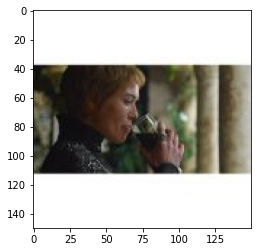

In [28]:
plt.imshow(train_images[15])
print(train_labels[15])

In [29]:
print(train_images.shape)
print(train_labels.shape)

print(np.amax(train_images[0]), np.amin(train_images[0]))
print(np.amax(train_labels), np.amin(train_labels))

# need to convert the images into the training size 32x32x3

resized_train_images = []
for img in train_images:
    resized_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    resized_train_images.append(resized_img)

train_images = np.array(resized_train_images)
print(train_images.shape)
print(train_labels.shape)

(663, 150, 150, 3)
(663,)
255 0
8 0
(663, 32, 32, 3)
(663,)


In [30]:
# normalization and one-hot encoding
# tell there are many ways to do a task in each api
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

print(train_images.shape)
print(train_labels.shape)

(663, 32, 32, 3)
(663, 10)


In [31]:
# except the last layer, we freeze. We want the network to learn new dataset 
# with few training steps using previously learned weights.
for layer in inzvaNet.layers[:-1]:
  layer.trainable = False

In [32]:
# compiler
inzvaNet.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [33]:
# training step
inzvaNet.fit(train_images, train_labels, batch_size=100, epochs=15, validation_split = 0.1)

Epoch 1/15
6/6 [==============================] - 1s 114ms/step - loss: 3.5412 - accuracy: 0.1091 - val_loss: 4.4848 - val_accuracy: 0.0000e+00
Epoch 2/15
6/6 [==============================] - 0s 80ms/step - loss: 2.5543 - accuracy: 0.2215 - val_loss: 2.8985 - val_accuracy: 0.0597
Epoch 3/15
6/6 [==============================] - 0s 83ms/step - loss: 2.1799 - accuracy: 0.2936 - val_loss: 3.7702 - val_accuracy: 0.0000e+00
Epoch 4/15
6/6 [==============================] - 0s 79ms/step - loss: 1.8450 - accuracy: 0.4010 - val_loss: 2.9141 - val_accuracy: 0.0299
Epoch 5/15
6/6 [==============================] - 0s 74ms/step - loss: 1.6089 - accuracy: 0.4161 - val_loss: 3.4443 - val_accuracy: 0.0448
Epoch 6/15
6/6 [==============================] - 0s 76ms/step - loss: 1.3739 - accuracy: 0.5352 - val_loss: 3.0699 - val_accuracy: 0.0896
Epoch 7/15
6/6 [==============================] - 0s 77ms/step - loss: 1.2699 - accuracy: 0.5487 - val_loss: 3.3032 - val_accuracy: 0.0597
Epoch 8/15
6/6 [==

In [34]:
# prepare test data
resized_test_images = []
for img in test_images:
    resized_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    resized_test_images.append(resized_img)

test_images = np.array(resized_test_images)
print(test_images.shape)
print(test_labels.shape)

(104, 32, 32, 3)
(104, 10)


In [35]:
# test
inzvaNet.evaluate(test_images, test_labels)

4/4 [==============================] - 0s 25ms/step - loss: 1.8649 - accuracy: 0.4519


[1.8649277687072754, 0.45192307233810425]

1
8


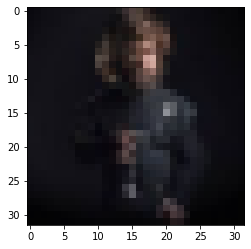

In [39]:
# checking some predictions of our model
randind = int(random.random()*104)
plt.imshow(test_images[randind])
print(np.argmax(inzvaNet.predict(test_images[[randind]])))
print(np.argmax(test_labels[randind]))